![](https://i.loli.net/2018/05/07/5af0400fe9c67.png)

# 机器学习回归分析实战：手写数字识别

算法： 
- kNN 
- SVM(高斯核， 线性核)

目录： 
- Step1: 用线性可分的数据集分类与算法对比
- Step2: 用线性不可分的数据集分类与算法对比
- Step3: 手写数字识别分类与算法对比
- Step4: 模型调参

In [1]:
# 自定义绘图和读取数据的函数
from process.process import plot_boundary, load_data, create_data
# sklearn生成自定义数据的函数
from sklearn.datasets import make_moons, make_blobs, make_classification, make_circles 
import matplotlib.pyplot as plt
import numpy as np

# sklearn中的svm和knn模型
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# sklearn中划分数据集的函数
from sklearn.model_selection import train_test_split

# 可视化魔法命令
%matplotlib inline

## Step1: 用线性可分的数据集分类

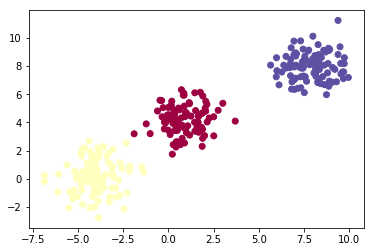

In [2]:
x_blob, y_blob = make_blobs(300, centers=3, random_state=3)

# 画出散点图
plt.scatter(x_blob[:, 0], x_blob[:, 1], c=y_blob, cmap=plt.cm.Spectral)

tips: 在代码输入完成之前按`tab`可以出现代码补全选项

SVM线性分类

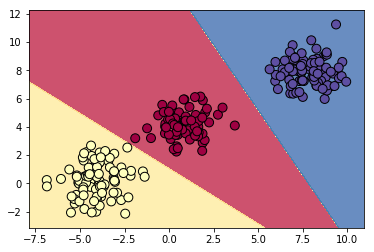

True

In [3]:
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state=300)

# 训练
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

# 绘图
plot_boundary(x_train, y_train, svc)

tips: 在函数中按两次`shift + tab`可以出现代码的文档提示

SVM高斯核函数分类

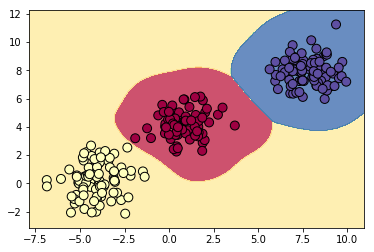

True

In [4]:
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state=300)

# 训练
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

# 绘图
plot_boundary(x_train, y_train, svc)

kNN分类

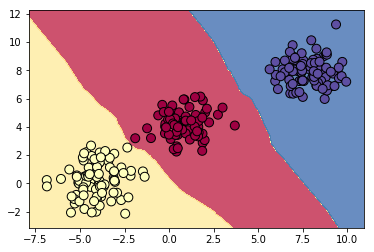

True

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state=300)

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
plot_boundary(x_train, y_train, knn)

## Step2: 用线性不可分的数据集分类

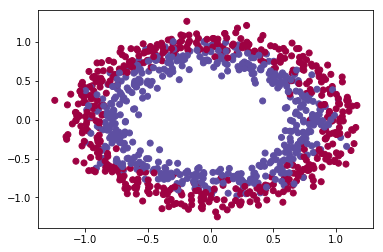

In [6]:
x_circle, y_circle = make_circles(1000, noise=0.1, random_state=300)

# 画出散点图
plt.scatter(x_circle[:, 0], x_circle[:, 1], 
            c=y_circle, cmap=plt.cm.Spectral)

SVM线性分类

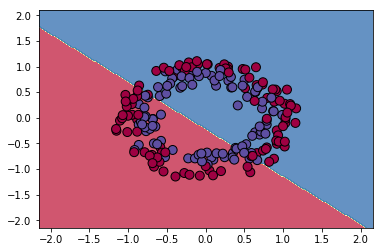

True

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_circle, y_circle, test_size=0.2, random_state=300)

svc = SVC(kernel='linear')

svc.fit(x_train, y_train)
plot_boundary(x_test, y_test, svc)

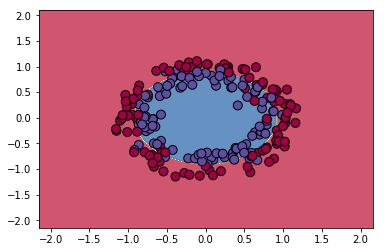

True

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_circle, y_circle, test_size=0.2, random_state=300)

svc = SVC()

svc.fit(x_train, y_train)
plot_boundary(x_test, y_test, svc)

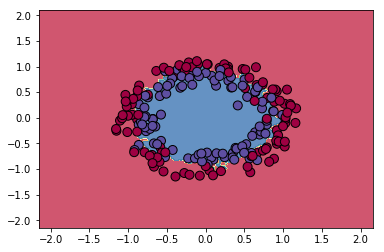

True

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_circle, y_circle, test_size=0.2, random_state=300)

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
plot_boundary(x_test, y_test, knn)

## Step3: 手写数字识别

导入数据和可视化

In [11]:
train_data, valid_data, test_data = load_data()
x_train, y_train, x_valid, y_valid, x_test, y_test = create_data(train_data, valid_data, test_data)

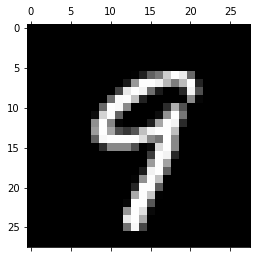

In [12]:
plt.gray()
plt.matshow(x_train[0].reshape(28, 28))
plt.show()

用svm线性分类器分类

In [13]:
# 训练
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
# 预测
y_pred = svc.predict(x_test)
np.mean(y_pred == y_test)                # 求出测试集准确度

0.926

用svm的高斯核分类

In [14]:
# 训练
svc = SVC()
svc.fit(x_train, y_train)
# 预测
y_pred = svc.predict(x_test)
np.mean(y_pred == y_test)

0.922

用knn分类

In [22]:
# 训练
knn = KNeighborsClassifier(2)
knn.fit(x_train, y_train)

# 预测
y_pred = knn.predict(x_test)
np.mean(y_pred == y_test)

0.945

###  Step4: 模型调参

In [16]:
from sklearn.model_selection import validation_curve

#### kNN调参
调节参数k

In [18]:
# 参数列表
k_list = [1, 5, 10, 20, 50]

# 用validation_curve在验证集上得到train_scores和valid_scores
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), x_valid, 
                                             y_valid, 'n_neighbors', k_list, cv=5)

5折交叉验证每个参数会产生五个结果，取平均即可

In [20]:
valid_scores

array([[0.87192118, 0.9009901 , 0.86069652, 0.87437186, 0.92307692],
       [0.8226601 , 0.86633663, 0.81094527, 0.86934673, 0.88717949],
       [0.80295567, 0.87128713, 0.81094527, 0.83417085, 0.84615385],
       [0.79310345, 0.84653465, 0.7761194 , 0.83417085, 0.8       ],
       [0.72906404, 0.77722772, 0.71641791, 0.73366834, 0.75384615]])

Text(0,0.5,'accuracy')

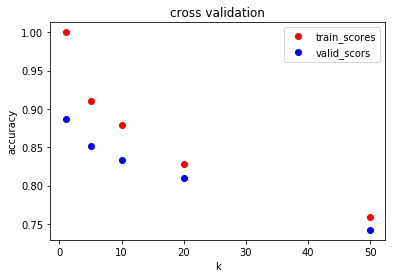

In [21]:
train_scores = np.mean(train_scores, axis=1)
valid_scores = np.mean(valid_scores, axis=1)

# 画出图像
ax = plt.subplot()
ax.plot(k_list, train_scores, 'ro', label='train_scores')
ax.plot(k_list, valid_scores, 'bo', label='valid_scors')
ax.legend() # 添加图例

plt.title('cross validation') # 添加标题
ax.set_xlabel('k') # 添加x轴描述
ax.set_ylabel('accuracy') # 添加y轴描述

p.s. `axis = 1`表示取每一行数据的平均数 

分析发现在手写数字识别数据集上k取得越大效果越差,所以取1-5差别都不太大

#### svm高斯核调参
主要是调节两个参数：  
- C：误差项的惩罚系数  
- gamma: 高斯核的衰减速率 

##### 1.先调系数c

In [26]:
svc_rbf = SVC(kernel='rbf')
C_list = [1, 10, 100, 200, 300, 500]

train_scores, valid_scores = validation_curve(svc_rbf, x_valid, y_valid,
                                            'C', C_list, cv=5)

Text(0,0.5,'accuracy')

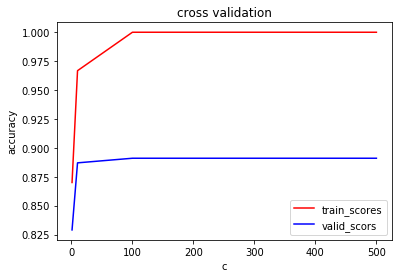

In [27]:
train_scores = np.mean(train_scores, axis=1)
valid_scores = np.mean(valid_scores, axis=1)

# 画出图像
ax = plt.subplot()
ax.plot(C_list, train_scores, 'r-', label='train_scores')
ax.plot(C_list, valid_scores, 'b-', label='valid_scors')
ax.legend() # 添加图例

plt.title('cross validation') # 添加标题
ax.set_xlabel('c') # 添加x轴描述
ax.set_ylabel('accuracy') # 添加y轴描述

可以看出，C差不多取100就好

##### 2.再调gamma

先粗调

In [28]:
svc_rbf = SVC(kernel='rbf', C=100)
gamma_list = [0.001, 0.01, 0.1, 0.5, 0.9]

train_scores, valid_scores = validation_curve(svc_rbf, x_valid, 
                               y_valid, 'gamma', gamma_list, cv=5)

p.s. 调第二个参数时第一个参数要取刚才调出的最优值

Text(0,0.5,'accuracy')

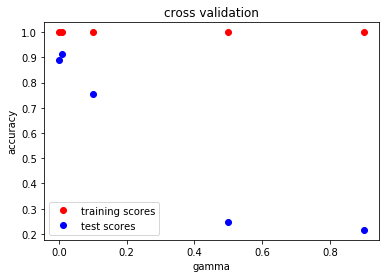

In [29]:
train_scores = np.mean(train_scores, axis=1)
valid_scores = np.mean(valid_scores, axis=1)

# 画出图像
ax = plt.subplot()
ax.plot(gamma_list, train_scores, 'ro', label='training scores')
ax.plot(gamma_list, valid_scores, 'bo', label='test scores')
ax.legend() # 添加图例

plt.title('cross validation') # 添加标题
ax.set_xlabel('gamma') # 添加x轴描述
ax.set_ylabel('accuracy') # 添加y轴描述

再精调

Text(0,0.5,'accuracy')

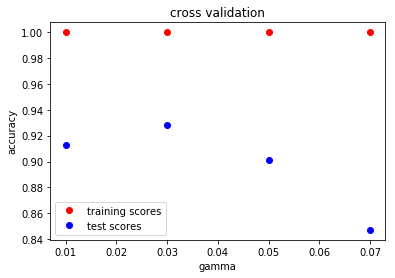

In [30]:
svc_rbf = SVC(kernel='rbf', C=100)
gamma_list = [0.01, 0.03, 0.05, 0.07]

train_scores, valid_scores = validation_curve(svc_rbf, x_valid, 
                               y_valid, 'gamma', gamma_list, cv=5)

train_scores = np.mean(train_scores, axis=1)
valid_scores = np.mean(valid_scores, axis=1)

# 画出图像
ax = plt.subplot()
ax.plot(gamma_list, train_scores, 'ro', label='training scores')
ax.plot(gamma_list, valid_scores, 'bo', label='test scores')
ax.legend() # 添加图例

plt.title('cross validation') # 添加标题
ax.set_xlabel('gamma') # 添加x轴描述
ax.set_ylabel('accuracy') # 添加y轴描述

得到最佳参数组合： 
C = 100， gamma = 0.03

In [31]:
svc = SVC(kernel='rbf', C = 100, gamma = 0.03)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
np.mean(y_pred == y_test)

0.978

未调参之前准确率为：0.922， 调参后为：0.978   
说明调参很成功

### 用调好参的高斯核SVM预测

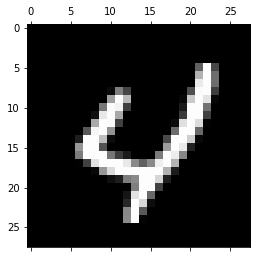

In [32]:
plt.gray()
plt.matshow(x_test[1].reshape(28, 28))
plt.show()

In [33]:
print('预测的结果是： ', y_pred[1])
print('真实的数字是： ', y_test[1])

预测的结果是：  4
真实的数字是：  4
